# Imports packages used in the following codes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import figure   
from pylab import rcParams
from xlrd import open_workbook
from itertools import cycle

In [2]:
rcParams['figure.figsize'] = 12, 8 #Sets a reasonable figure size for this notebook

# Imports data from Arbin excel file and plots discharge and charge vs. cycle on left axis and coulombic efficiency vs. cycle on right axis

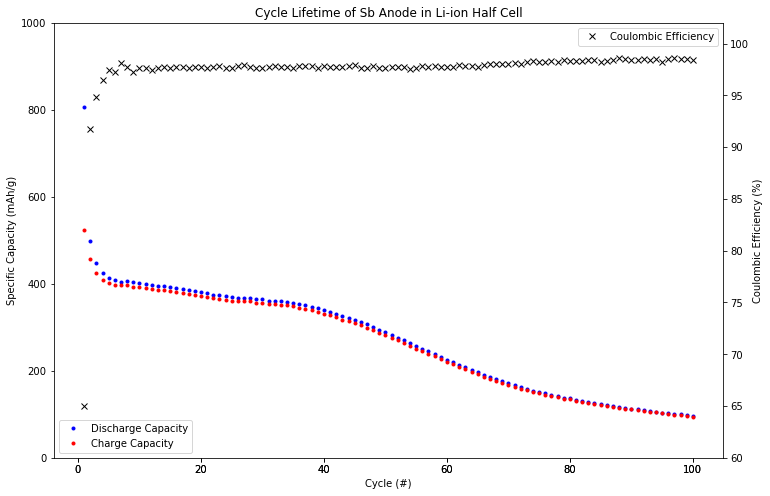

In [3]:
cycle_data = pd.read_excel('Arbin_Cycling_Data.xlsx',  
        sheet_name=-1,                         
        usecols='A,F,G',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])      


mass = 0.00092            #mass of active material in grams
                          #"1000" is the conversion factor from Ah to mAh

cycle_fig = figure()

capacity = cycle_fig.add_subplot(111)     
capacity.plot(cycle_data['cycle'],cycle_data['discharge']/mass*1000,'b.', label='Discharge Capacity')
capacity.plot(cycle_data['cycle'],cycle_data['charge']/mass*1000,'r.', label='Charge Capacity')
capacity.set_xlabel('Cycle (#)')
capacity.set_ylabel('Specific Capacity (mAh/g)')
capacity.set_xlim(0,100)
capacity.set_ylim(0,1000)
plt.legend(loc="lower left")

CE = cycle_fig.add_subplot(111, sharex=capacity, frameon=False)    
CE.plot(cycle_data['cycle'],
        (cycle_data['charge']/cycle_data['discharge'])*100,'kx', label='Coulombic Efficiency')
CE.yaxis.tick_right()
CE.yaxis.set_label_position("right")
CE.set_ylabel('Coulombic Efficiency (%)',color='k')   
CE.set_ylim(60,102)

plt.title('Cycle Lifetime of Sb Anode in Li-ion Half Cell')
plt.legend(loc='upper right')
plt.show()

# Imports data from Arbin excel file and plots discharge, charge, and excess capacity vs. cycle

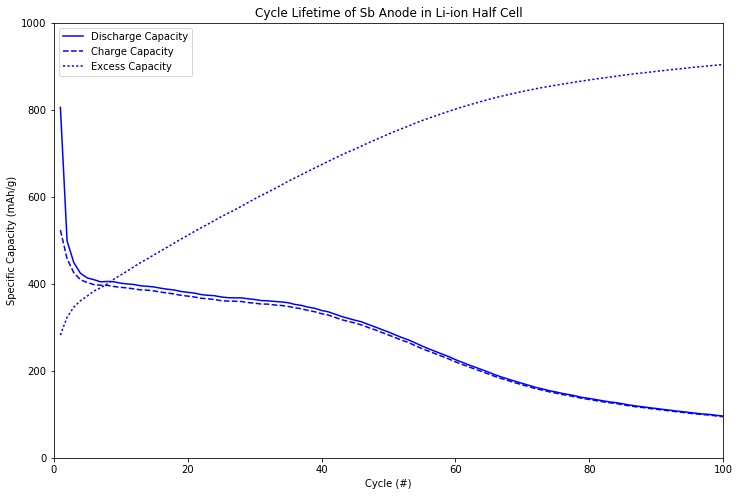

In [4]:
cycle_data = pd.read_excel('Arbin_Cycling_Data.xlsx',  
        sheet_name=-1,                         
        usecols='A,F,G',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])      


mass = 0.00092            #mass of active material in grams
                          #"1000" is the conversion factor from Ah to mAh

plt.plot(cycle_data['cycle'],cycle_data['discharge']/mass*1000,linestyle='-', color='b', label='Discharge Capacity')
plt.plot(cycle_data['cycle'],cycle_data['charge']/mass*1000,linestyle='--', color='b', label='Charge Capacity')
plt.plot(cycle_data['cycle'],
        (np.cumsum(cycle_data['discharge']-cycle_data['charge'])/mass*1000),
        linestyle=':', color='b', label='Excess Capacity')

plt.xlabel('Cycle (#)')
plt.ylabel('Specific Capacity (mAh/g)')
plt.xlim(0,100)
plt.ylim(0,1000)
plt.legend()
plt.title('Cycle Lifetime of Sb Anode in Li-ion Half Cell')
plt.show()

# Imports multiple data sets from a list of Arbin excel files and plots discharge, charge, and excess capacity vs. cycle for all of them in different color sets

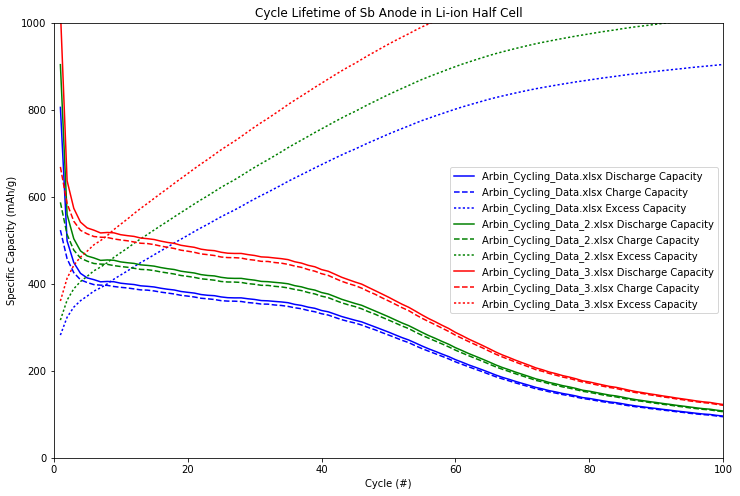

In [5]:
files = ['Arbin_Cycling_Data.xlsx','Arbin_Cycling_Data_2.xlsx','Arbin_Cycling_Data_3.xlsx']

mass = {} #(g)
mass['Arbin_Cycling_Data.xlsx'] = 0.00092   #mass of active material in grams
mass['Arbin_Cycling_Data_2.xlsx'] = 0.00082
mass['Arbin_Cycling_Data_3.xlsx'] = 0.00072

colorcycle = cycle(["b","g","r"]) #an iterable list of colors for data from each sample

for file in files:
    cycle_data = pd.read_excel(file,  
            sheet_name=-1,                         
            usecols='A,F,G',    #these columns change depending on which Arbin the data originated
            names=['cycle','charge','discharge'])      

    colors = next(colorcycle)
    plt.plot(cycle_data['cycle'],cycle_data['discharge']/mass[file]*1000,
             linestyle='-', color=colors, label=file+' Discharge Capacity')
    plt.plot(cycle_data['cycle'],cycle_data['charge']/mass[file]*1000,
             linestyle='--', color=colors, label=file+' Charge Capacity')
    plt.plot(cycle_data['cycle'],(np.cumsum(cycle_data['discharge']-cycle_data['charge'])/mass[file]*1000),
             linestyle=':', color=colors, label=file+' Excess Capacity')

plt.xlabel('Cycle (#)')
plt.ylabel('Specific Capacity (mAh/g)')
plt.xlim(0,100)
plt.ylim(0,1000)
plt.legend()
plt.title('Cycle Lifetime of Sb Anode in Li-ion Half Cell')
plt.show()

# Imports EIS data from Gamry ".DTA" file and outputs Bode plot

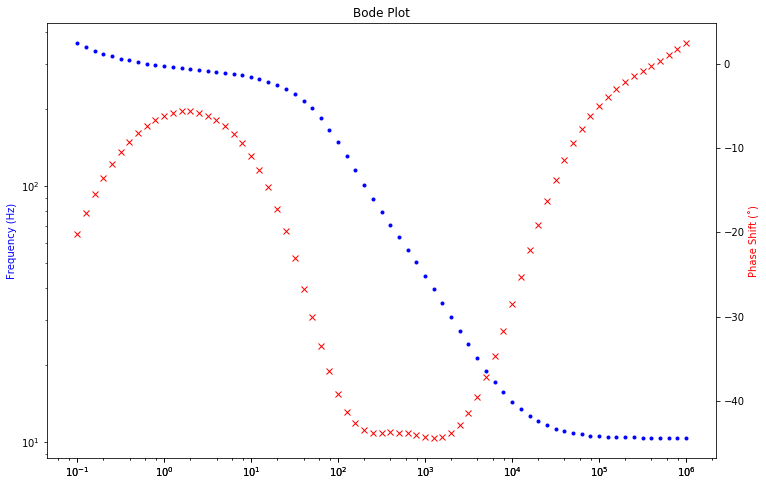

In [6]:
datafile = open('Gamry_EIS_Data.DTA', encoding='latin1')   
#set encoding as "latin1" otherwise the code hangs on the infinity symbol

counter=0
for line in datafile:
    counter += 1
    if line.startswith('ZCURVE'):  #"ZCURVE" appears just before the data of interest
        counter += 2       #Data starts two rows after 'ZCURVE'
        break             

EIS_data = pd.read_csv('Gamry_EIS_Data.DTA',
                       delimiter = '\t',         #Indicates data columns are separated by a tab
                       names=['Freq','Zreal','Zimag','Zmod','Zphz'],
                       usecols=(3,4,5,7,8), 
                       skiprows = counter)
     
Bode_plot = figure()

bode1 = Bode_plot.add_subplot(111)     
bode1.plot(EIS_data['Freq'],EIS_data['Zmod'], 'b.', linestyle='none')
bode1.set_ylabel('Impedance ($\Omega$)',color='b')
bode1.set_yscale('log')
bode1.set_ylabel('Frequency (Hz)')
bode1.set_xscale('log')
bode1.set_title('Bode Plot')

bode2 = Bode_plot.add_subplot(111, sharex=bode1, frameon=False)    
bode2.plot(EIS_data['Freq'],EIS_data['Zphz'], 'rx', linestyle='none')
bode2.yaxis.tick_right()
bode2.yaxis.set_label_position("right")
bode2.set_ylabel('Phase Shift (˚)',color='r')

plt.show()

# Imports EIS data from Gamry ".DTA" file and outputs Nyquist plot

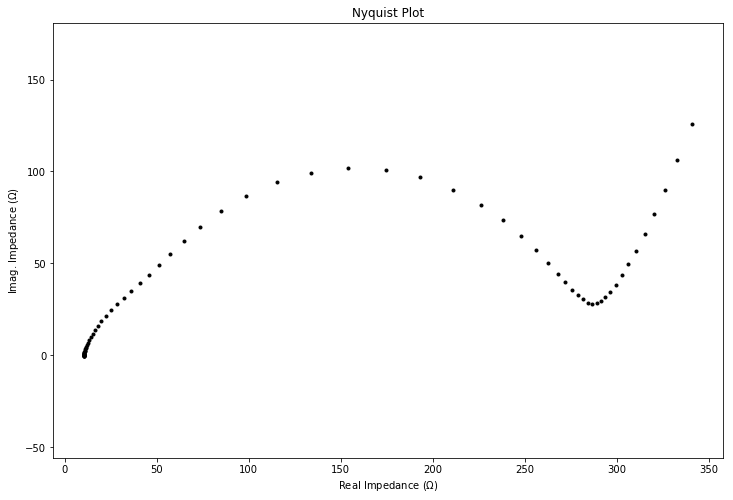

In [7]:
datafile = open('Gamry_EIS_Data.DTA', encoding='latin1')   
#set encoding as "latin1" otherwise the code hangs on the infinity symbol

counter=0
for line in datafile:
    counter += 1
    if line.startswith('ZCURVE'):  #"ZCURVE" appears just before the data of interest
        counter += 2       #Data starts two rows after 'ZCURVE'
        break             

EIS_data = pd.read_csv('Gamry_EIS_Data.DTA',
                       delimiter = '\t',         #Indicates data columns are separated by a tab
                       names=['Freq','Zreal','Zimag','Zmod','Zphz'],
                       usecols=(3,4,5,7,8), 
                       skiprows = counter)

plt.plot(EIS_data['Zreal'],-EIS_data['Zimag'], 'k.', linestyle='none')
plt.ylabel('Imag. Impedance ($\Omega$)',color='k')
plt.xlabel('Real Impedance ($\Omega$)',color='k')
plt.title('Nyquist Plot')
plt.axes().set_aspect('equal', 'datalim') #Nyquist plots should have equally scaled axes
plt.show()

# Imports EIS data from Gamry ".DTA" file and outputs Bode and Nyquist plots together

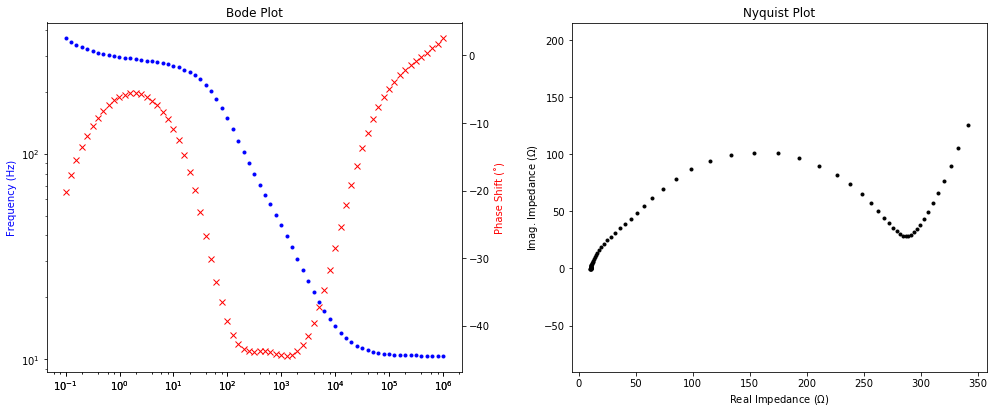

In [8]:
datafile = open('Gamry_EIS_Data.DTA', encoding='latin1')   
#set encoding as "latin1" otherwise the code hangs on the infinity symbol
counter=0
for line in datafile:
    counter += 1
    if line.startswith('ZCURVE'):  #"ZCURVE" appears just before the data of interest
        counter += 2       #Data starts two rows after 'ZCURVE'
        break             

EIS_data = pd.read_csv('Gamry_EIS_Data.DTA',
                       delimiter = '\t',         #Indicates data columns are separated by a tab
                       names=['Freq','Zreal','Zimag','Zmod','Zphz'],
                       usecols=(3,4,5,7,8), 
                       skiprows = counter)

EIS_fig = figure(figsize=[14,6])

bode1 = EIS_fig.add_subplot(121) 
bode1.plot(EIS_data['Freq'],EIS_data['Zmod'], 'b.', linestyle='none')
bode1.set_ylabel('Impedance ($\Omega$)',color='b')
bode1.set_yscale('log')
bode1.set_ylabel('Frequency (Hz)')
bode1.set_xscale('log')
bode1.set_title('Bode Plot')

bode2 = EIS_fig.add_subplot(121, sharex=bode1, frameon=False)
bode2.plot(EIS_data['Freq'],EIS_data['Zphz'], 'rx', linestyle='none')
bode2.yaxis.tick_right()
bode2.yaxis.set_label_position("right")
bode2.set_ylabel('Phase Shift (˚)',color='r')

nyquist = EIS_fig.add_subplot(122)    
nyquist.plot(EIS_data['Zreal'],-EIS_data['Zimag'], 'k.', linestyle='none')
nyquist.set_ylabel('Imag. Impedance ($\Omega$)',color='k')
nyquist.set_xlabel('Real Impedance ($\Omega$)',color='k')
nyquist.set_title('Nyquist Plot')
nyquist.set_aspect('equal',adjustable='datalim') #Nyquist plots should have equally scaled axes
                                                
plt.tight_layout()
plt.show()

# Imports voltage data from Arbin excel file and plots voltage vs. time

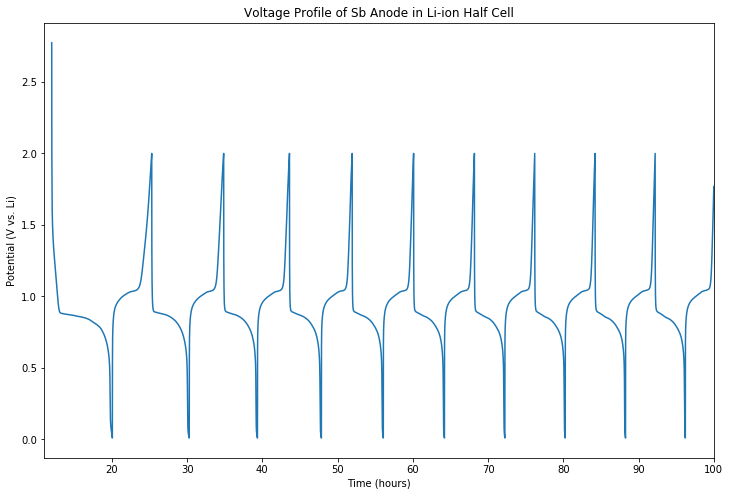

In [9]:
filename = 'Arbin_Cycling_Data.xlsx'
workbook = open_workbook(filename) 

all_data = pd.DataFrame()  

for sheet in range(1,workbook.nsheets-1):    
    data = pd.read_excel(filename, sheet_name=sheet, 
            usecols='B,E,F,H,I,J', 
            names=['time','step','cycle','voltage','charge','discharge'])
    all_data = all_data.append(data)
    
plt.plot(all_data['time']/3600,all_data['voltage'])
plt.xlabel('Time (hours)')
plt.ylabel('Potential (V vs. Li)')
plt.xlim(11,100)
plt.title('Voltage Profile of Sb Anode in Li-ion Half Cell')
plt.show()

# Imports voltage data from Arbin excel file and plots voltage vs. capacity for select cycles

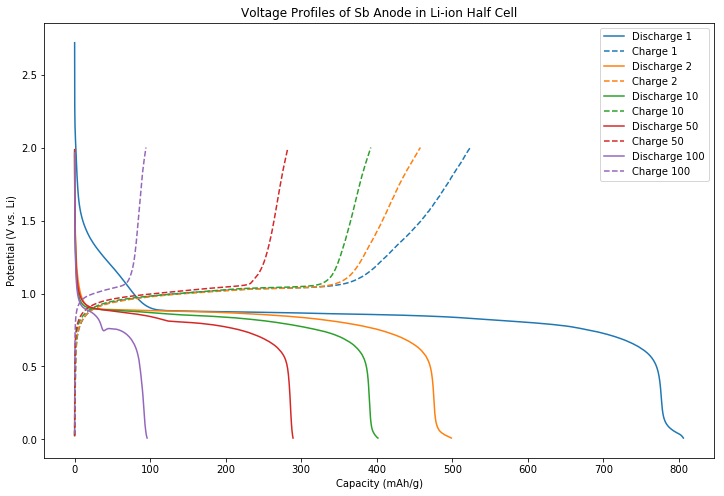

In [10]:
discharge_index = 2    #value determined by schedule file on the Arbin instrument
charge_index = 3       #value determined by schedule file on the Arbin instrument
mass = 0.00092         #mass of active material in grams

filename = 'Arbin_Cycling_Data.xlsx'
workbook = open_workbook(filename) 

all_data = pd.DataFrame()  

for sheet in range(1,workbook.nsheets-1):    
    data = pd.read_excel(filename, sheet_name=sheet, 
            usecols='B,E,F,H,I,J', 
            names=['time','step','cycle','voltage','charge','discharge'])
    all_data = all_data.append(data)

data_by_cycle = all_data.groupby(['cycle','step']) 

for cycle in [1,2,10,50,100]: 
    
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    p = plt.plot(discharge, voltage, label='Discharge '+str(cycle))

    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    plt.plot(charge, voltage, color = p[0].get_color(), linestyle='--', label='Charge '+str(cycle))
    
plt.xlabel('Capacity (mAh/g)')
plt.ylabel('Potential (V vs. Li)')
plt.title('Voltage Profiles of Sb Anode in Li-ion Half Cell')
plt.legend()
plt.show()

# Imports voltage data from Arbin excel file and plots dQ/dV vs. voltage for select cycles

/Users/maxwellschulze/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


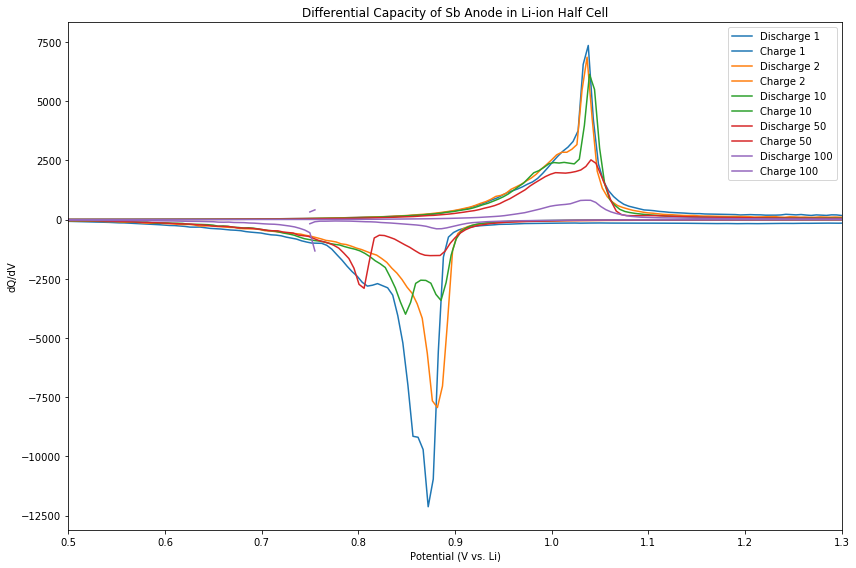

In [11]:
discharge_index = 2    #value determined by schedule file on the Arbin instrument
charge_index = 3       #value determined by schedule file on the Arbin instrument
mass = 0.00092         #mass of active material in grams

filename = 'Arbin_Cycling_Data.xlsx'
workbook = open_workbook(filename) 

all_data = pd.DataFrame()  

for sheet in range(1,workbook.nsheets-1):    
    data = pd.read_excel(filename, sheet_name=sheet, 
            usecols='B,E,F,H,I,J', 
            names=['time','step','cycle','voltage','charge','discharge'])
    all_data = all_data.append(data)

data_by_cycle = all_data.groupby(['cycle','step']) 

for cycle in [1,2,10,50,100]:
    
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    p = plt.plot(voltage, dqdv, label='Discharge '+str(cycle))

    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    plt.plot(voltage, dqdv, color=p[0].get_color(), label='Charge '+str(cycle))
    
plt.xlim(0.5,1.3)
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Li)')
plt.title('Differential Capacity of Sb Anode in Li-ion Half Cell')
plt.legend()
plt.tight_layout()
plt.show()

# Imports voltage data from Arbin excel file and plots dQ/dV vs. voltage for all cycles with color gradient

/Users/maxwellschulze/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


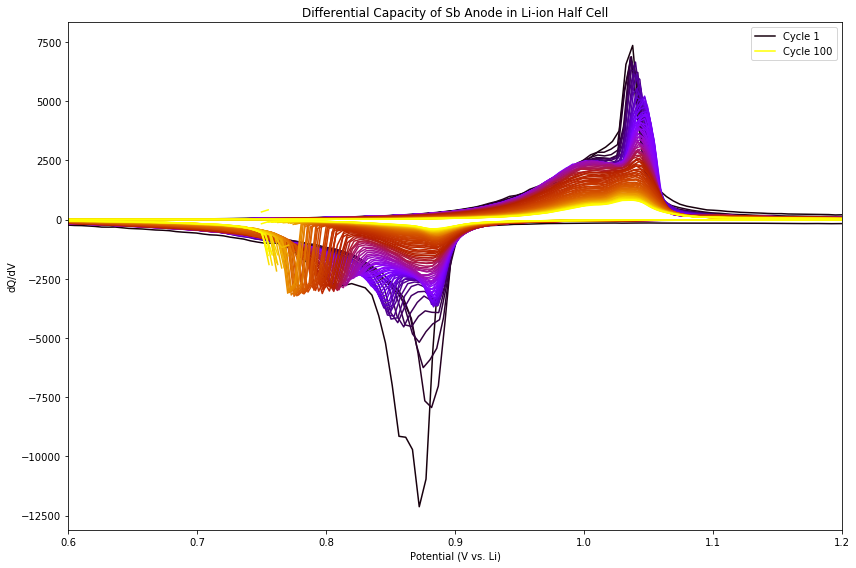

In [12]:
discharge_index = 2    #value determined by schedule file on the Arbin instrument
charge_index = 3       #value determined by schedule file on the Arbin instrument
mass = 0.00092         #mass of active material in grams

filename = 'Arbin_Cycling_Data.xlsx'
workbook = open_workbook(filename) 

all_data = pd.DataFrame()  

for sheet in range(1,workbook.nsheets-1):    
    data = pd.read_excel(filename, sheet_name=sheet, 
            usecols='B,E,F,H,I,J', 
            names=['time','step','cycle','voltage','charge','discharge'])
    all_data = all_data.append(data)

data_by_cycle = all_data.groupby(['cycle','step']) 

num_cycles = all_data['cycle'].iat[-1]-1
for cycle in range(1,num_cycles+1):
    
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    dqdv = np.gradient(discharge)/np.gradient(voltage)
    plt.plot(voltage, dqdv, color=plt.cm.gnuplot(cycle/num_cycles)) 
    
    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    dqdv = np.gradient(charge)/np.gradient(voltage)
    
    #adds labels to only first and last cycles so legend isn't huge
    if cycle == 1 or cycle == num_cycles:
        plt.plot(voltage, dqdv, color=plt.cm.gnuplot(cycle/(num_cycles)), label = "Cycle "+str(cycle))
    else:
        plt.plot(voltage, dqdv, color=plt.cm.gnuplot(cycle/num_cycles))
    
plt.xlim(0.6,1.2)
plt.ylabel('dQ/dV')
plt.xlabel('Potential (V vs. Li)')
plt.title('Differential Capacity of Sb Anode in Li-ion Half Cell')
plt.legend()
plt.tight_layout()
plt.show()